In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/airlines_flights_data.csv')

# Display the first 5 rows
display(df.head())

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [16]:
# Check for missing values
print(df.isnull().sum())

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [17]:
# Check for duplicate rows
print(f'Number of duplicate rows: {df.duplicated().sum()}')

Number of duplicate rows: 0


In [18]:
# Get unique values for categorical columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Unique values in flight: ['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
Unique values in source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Unique values in departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Unique values in stops: ['zero' 'one' 'two_or_more']
Unique values in arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Unique values in destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Unique values in class: ['Economy' 'Business']


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Define features (X) and target (y)
X = df.drop(['price', 'index', 'flight'], axis=1)
y = df['price']

# Identify categorical and numerical columns
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns

# Create a column transformer for one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep numerical columns as they are
)

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

print("Shape of processed features:", X_processed.shape)

Shape of processed features: (300153, 37)


In [20]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (240122, 37)
Shape of X_test: (60031, 37)
Shape of y_train: (240122,)
Shape of y_test: (60031,)


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import tensorflow as tf

# Check for GPU
gpu_available = tf.config.list_physical_devices('GPU')
if gpu_available:
    print("GPU is available and will be used.")
else:
    print("GPU not available, using CPU.")

linear_reg_model = LinearRegression(n_jobs=-1)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train Linear Regression model
print("Training Linear Regression model...")
linear_reg_model.fit(X_train, y_train)
print("Linear Regression model trained.")

# Train Random Forest Regressor model
print("Training Random Forest Regressor model...")
random_forest_model.fit(X_train, y_train)
print("Random Forest Regressor model trained.")

# Make predictions on the test set
y_pred_linear_reg = linear_reg_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate Linear Regression model
mae_linear_reg = mean_absolute_error(y_test, y_pred_linear_reg)
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
rmse_linear_reg = np.sqrt(mse_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print("\nLinear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_linear_reg:.2f}")
print(f"Mean Squared Error (MSE): {mse_linear_reg:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear_reg:.2f}")
print(f"R-squared (R2): {r2_linear_reg:.2f}")

# Evaluate Random Forest Regressor model
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("\nRandom Forest Regressor Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_random_forest:.2f}")
print(f"Mean Squared Error (MSE): {mse_random_forest:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_random_forest:.2f}")
print(f"R-squared (R2): {r2_random_forest:.2f}")

GPU is available and will be used.
Training Linear Regression model...
Linear Regression model trained.
Training Random Forest Regressor model...
Random Forest Regressor model trained.

Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 4553.29
Mean Squared Error (MSE): 45720748.72
Root Mean Squared Error (RMSE): 6761.71
R-squared (R2): 0.91

Random Forest Regressor Model Evaluation:
Mean Absolute Error (MAE): 1077.41
Mean Squared Error (MSE): 7767712.43
Root Mean Squared Error (RMSE): 2787.06
R-squared (R2): 0.98


Let's try a more efficient model like LightGBM. LightGBM is a gradient boosting framework that uses tree-based learning algorithms. It is designed to be distributed and efficient.

In [26]:
import lightgbm as lgb

# Initialize LightGBM Regressor model
lgbm_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

# Train LightGBM model
print("Training LightGBM model...")
lgbm_model.fit(X_train, y_train)
print("LightGBM model trained.")

# Make predictions on the test set
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluate LightGBM model
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("\nLightGBM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lgbm:.2f}")
print(f"Mean Squared Error (MSE): {mse_lgbm:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgbm:.2f}")
print(f"R-squared (R2): {r2_lgbm:.2f}")

Training LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 240122, number of used features: 37
[LightGBM] [Info] Start training from score 20888.572417
LightGBM model trained.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(



LightGBM Model Evaluation:
Mean Absolute Error (MAE): 2317.56
Mean Squared Error (MSE): 15487469.64
Root Mean Squared Error (RMSE): 3935.41
R-squared (R2): 0.97


In [27]:
# Create a dictionary to store the evaluation metrics
evaluation_metrics = {
    'Linear Regression': {
        'MAE': mae_linear_reg,
        'MSE': mse_linear_reg,
        'RMSE': rmse_linear_reg,
        'R2': r2_linear_reg
    },
    'Random Forest': {
        'MAE': mae_random_forest,
        'MSE': mse_random_forest,
        'RMSE': rmse_random_forest,
        'R2': r2_random_forest
    },
    'LightGBM': {
        'MAE': mae_lgbm,
        'MSE': mse_lgbm,
        'RMSE': rmse_lgbm,
        'R2': r2_lgbm
    }
}

metrics_df = pd.DataFrame(evaluation_metrics).T

# Display the transposed DataFrame
display(metrics_df)

,MAE,MSE,RMSE,R2
Linear Regression,4553.289928,4.572075e+07,6761.711967,0.911305
Random Forest,1077.406924,7.767712e+06,2787.061613,0.984931
LightGBM,2317.558602,1.548747e+07,3935.412259,0.969955


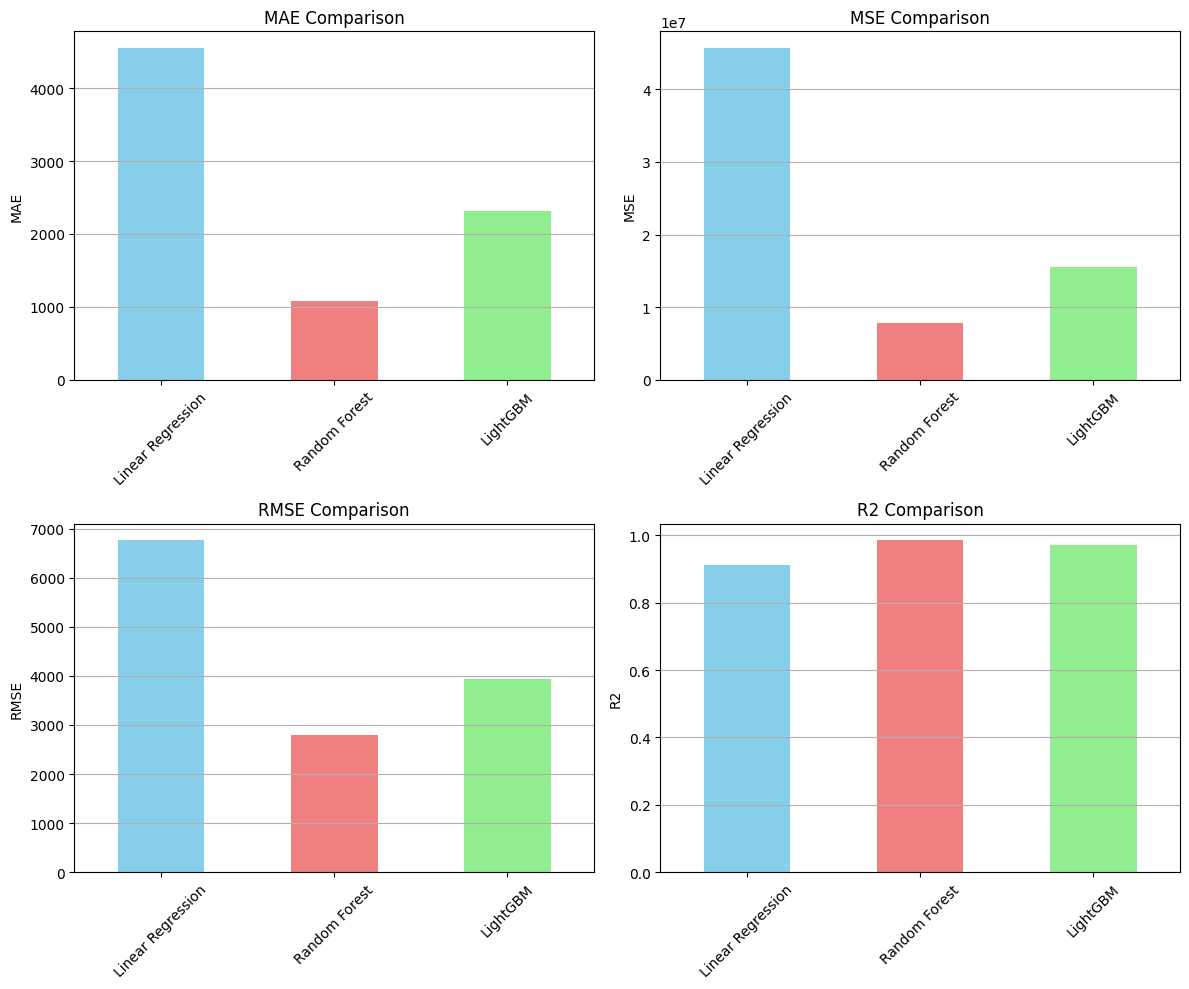

In [28]:
import matplotlib.pyplot as plt

# Define the metrics to plot
metrics = ['MAE', 'MSE', 'RMSE', 'R2']

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot bar charts for each metric
for i, metric in enumerate(metrics):
    metrics_df[metric].plot(kind='bar', ax=axes[i], color=['skyblue', 'lightcoral', 'lightgreen'])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

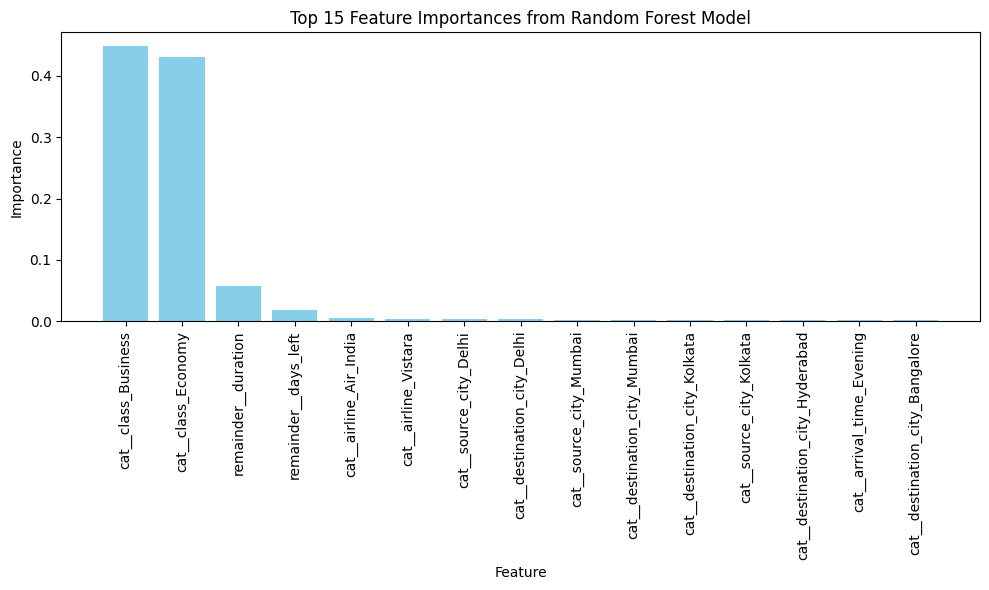

In [29]:
# Get feature importances from the Random Forest model
feature_importances = random_forest_model.feature_importances_

# The get_feature_names_out() method returns the names of the output features
feature_names = preprocessor.get_feature_names_out(X.columns)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Select the top N features for visualization
N = 15
top_n_features = feature_importance_df.head(N)

# Visualize the top N feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_n_features['feature'], top_n_features['importance'], color='skyblue')
plt.title(f'Top {N} Feature Importances from Random Forest Model')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   Evaluation metrics (MAE, MSE, RMSE, R2) were calculated and visualized for Linear Regression, Random Forest, and LightGBM models, showing a performance comparison across these metrics.
*   Feature importances were extracted from the Random Forest model, identifying the top 15 features that most significantly influence price prediction.

### Insights or Next Steps

*   Based on the model evaluation and feature importance analysis, focus on further optimizing the Random Forest model or exploring the impact of the identified key features on other models.
*   Investigate the relationships between the top features and the target variable to gain deeper insights into the pricing factors.
